# Avaliação 4
## FSC5705 - Física Computacional

### Ajuste linear

Apenas escreva o seu código na região marcada por:

```
# YOUR CODE HERE
raise NotImplementedError()
```
Use as células originais, não crie células novas.

### Questão 1

A terceira lei de Kepler relaciona as distâncias dos planetas até o Sol com o período de suas órbitas. Vamos tentar redescobrir esta lei usando técnicas um pouco mais modernas, explorando os dados da tabela abaixo. A coluna $R$ dá o semi-eixo maior da órbita do planeta, em unidades astronômicas ($\mathrm{au}$), onde
$1\,\mathrm{au} = 1.495978707 \times 10^{11}\,\mathrm{m}$ é a distância média entre a Terra e o Sol. A Coluna $T$ contém o período orbital, em anos.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Tabela de dados.
# Fonte: Solar System Dynamics - JPL/NASA
# Períodos: https://ssd.jpl.nasa.gov/?planet_phys_par
# Distâncias: https://ssd.jpl.nasa.gov/txt/p_elem_t1.txt
planetas = np.array([('Mercúrio', 0.38709927,   0.2408467),
                     ('Vênus',    0.72333566,   0.61519726),
                     ('Terra',    1.00000261,   1.0000174),
                     ('Marte',    1.52371034,   1.8808476),
                     ('Júpiter',  5.20288700,  11.862615),
                     ('Saturno',  9.53667594,  29.447498),
                     ('Urano',   19.18916464,  84.016846),
                     ('Netuno',  30.06992276, 164.79132),
                     ('Plutão 😢',  39.48211675, 247.92065)],
                    dtype=[('nome', 'U8'), ('R', 'float64'), ('T', 'float64')])

# Variáveis com arrays para acesso rápido.
nome = planetas['nome']
R = planetas['R']
T = planetas['T']

**a. (1 ponto)** Faça um gráfico da distância em função do período, usando escala logarítmica nos dois eixos.

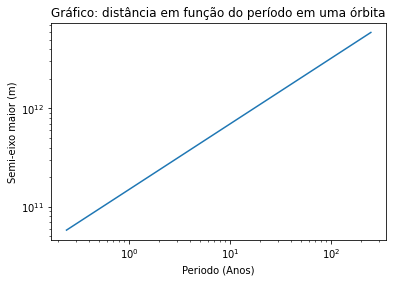

In [4]:
fig, axes = plt.subplots() 
axes.set_xlabel('Periodo (Anos)')
axes.set_ylabel('Semi-eixo maior (m)')
axes.set_title('Gráfico: distância em função do período em uma órbita')
axes.set_xscale('log')
axes.set_yscale('log')
axes.plot(T , R * 1.495978707e11)
plt.show()

**b. (2 pontos)** Se tudo correu bem, você vai ver que os pontos formam aproximadamente uma linha reta no gráfico em escala logarítmica. Isto indica que as variáveis $R$ e $T$ estão relacionadas por uma lei de potência da forma

\begin{align}
\log R &= a + b \log T \\
\log R &= \log c + \log (T^b) \\
\log R &= \log (c\,T^b) \\
\implies R &= cT^b, \qquad c = 10^a.
\end{align}

Kepler encontrou o expoente $b$ por tentativa e erro. Nós temos o luxo de usar ajuste linear. 

Crie variáveis contendo $\log R$ e $\log T$, lembrando que $\log$ é o logaritmo em base 10, que em numpy é `np.log10()`. Como não temos dados de incerteza, admita que as incertezas são todas iguais a 1. Escrevendo o código explicitamente, faça um ajuste linear e imprima os valores dos coeficiente $a$ e $b$.

In [5]:
log_T = np.log10(T)
log_R = np.log10(R)


s = np.full(len(log_T), 1.0)
S = np.sum(s**-2)
Sx = np.sum(log_T / s**2)
Sy = np.sum(log_R / s**2)
Sxy = np.sum(log_T * log_R / s**2)
Sxx = np.sum(log_T**2 / s**2)
delta = S * Sxx - Sx**2

# Coeficientes do ajuste linear:
a = (Sxx * Sy - Sx * Sxy) / delta
b = (S * Sxy - Sx * Sy) / delta
print(f'a = {a:.7f} Mpc, b = {b:.5f} Mpc/Anos')

a = 0.0000082 Mpc, b = 0.66674 Mpc/Anos


**c. (2 pontos)** O expoente da relação entre $T$ e $R$ é dado pelo coeficiente $b$. Veja que o valor é muito próximo de $2/3$, como de fato descobriu Kepler. Mas, o que está por trás do coeficiente linear, $a$? Vamos mostrar que podemos usá-lo para calcular a massa do Sol.

Com o desenvolvimento da mecânica, Newton demonstrou que a terceira lei de Kepler é descrita por

$$
\frac{R^3}{T^2} = \frac{G (M + m)}{4 \pi^2} \approx \frac{GM}{4 \pi^2},
$$

onde $G$ é a constante gravitacional, $M$ é a massa do Sol, e $m$ é a massa do planeta (desprezível para nossos propósitos). Vamos expressar a nossa lei empírica nos mesmos termos da equação acima.

\begin{align}
R &= c T^b \\
R &= 10^a\,T^b \\
R^3 &= 10^{3a}\,T^{3b} \\
\frac{R^3}{T^2} &= 10^{3a} \frac{T^{3b}}{T^2} \\
\frac{R^3}{T^2} &= 10^{3a}\,T^{3b - 2}.
\end{align}

Verifique que $3b - 2 \approx 10^{-4}$, logo $T^{3b - 2}$ vale 1 com uma boa precisão. Igualando as duas equações,

\begin{align}
\frac{R^3}{T^2} &= \frac{GM}{4 \pi^2} = 10^{3a} \\
\implies \frac{GM}{4 \pi^2} &= 10^{3a} \\
M &= \frac{4 \pi^2 10^{3a}}{G}.
\end{align}

A constante gravitacional $G$ pode ser medida por meios independentes, aqui mesmo na Terra. Sabemos que $G = 6.6743015 \times 10^{-11}\,\mathrm{m}^3\,\mathrm{kg}^{-1}\,\mathrm{s}^{-2}$, ou, nas unidades do nosso problema, $G = 1.9853520 \times 10^{-29}\,\mathrm{au}^3\,\mathrm{kg}^{-1}\,\mathrm{a}^{-2}$.

Usando o coeficiente $a$ que você ajustou, calcule e imprima a massa do Sol, em quilogramas. Imprima também o erro relativo ao valor "oficial", $M_\odot = (1.98847 \pm 0.00007) \times 10^{30}\,\mathrm{kg}$.

In [6]:
def M(a):
    return (4 * np.pi**2 * 10**(3*a) ) / G

G = 1.9853520e-29 
M_tab = 1.98847e30 

Erro = (np.abs(M(a) - M_tab) / M_tab) * 100

print(f'Massa: {M(a)}Kg, Erro relativo: {Erro}')

Massa: 1.9885975877168235e+30Kg, Erro relativo: 0.006416376250260946


### Questão 2

Vamos agora descobrir que o universo está em expansão, de acordo com a lei de Hubble–Lemaître. No começo do século 20, com o desenvolvimento da Relatividade Geral, Alexander Friedmann, e logo depois Georges Lemaître, chegaram de forma independente em soluções nas quais o universo estava em expansão. Edwin Hubble usou estrelas variáveis do tipo cefeidas para calcular as distâncias de algumas galáxias próximas (determinar distâncias astronômicas é um problema enorme, veja a [Escada cósmica de distâncias](https://en.wikipedia.org/wiki/Cosmic_distance_ladder)). Juntando essas distâncias com medidas de velocidade provenientes do [*redshift*](https://en.wikipedia.org/wiki/Redshift#Measurement,_characterization,_and_interpretation) (desvio do espectro para o vermelho), ele obteve uma evidência observacional de que de fato o universo se expandia.

Vamos usar alguns dados mais modernos de distâncias e redshifts de [Freedman et al (2001)](https://ui.adsabs.harvard.edu/abs/2001ApJ...553...47F/abstract) para tentar repetir o feito de Hubble. Queremos determinar a taxa em que o universo se expande.

Considere a tabela abaixo. Temos a velocidade em que as galáxias se afastam de nós, $v$, em $\mathrm{km}\,\mathrm{s}^{-1}$, obtida através do redshift de linhas espectrais. Temos também a distância $d$, em [megaparsecs](https://pt.wikipedia.org/wiki/Parsec) ($\mathrm{Mpc}$), obtidas através de estrelas do tipo cefeidas.

In [7]:
galaxias = np.array([('IC 4182',321, 4.53),
                     ('NGC 0300', 144, 2.02),
                     ('NGC 0925', 553, 9.12),
                     ('NGC 1326A', 1836, 16.14),
                     ('NGC 1365', 1636, 17.22),
                     ('NGC 1425', 1512, 20.89),
                     ('NGC 2090', 931, 11.43),
                     ('NGC 2403', 131, 3.13),
                     ('NGC 2541', 559, 11.22),
                     ('NGC 3031', -34, 3.55),
                     ('NGC 3198', 662, 13.68),
                     ('NGC 3351', 778, 13.43),
                     ('NGC 3368', 897, 9.33),
                     ('NGC 3621', 805, 9.86),
                     ('NGC 4321', 1571, 6.55),
                     ('NGC 4414', 716, 16.6),
                     ('NGC 4496A', 1730, 14.52),
                     ('NGC 4535', 1961, 14.79),
                     ('NGC 4536', 1804, 14.45),
                     ('NGC 4548', 486, 15),
                     ('NGC 4639', 1010, 20.99),
                     ('NGC 4725', 1206, 11.91),
                     ('NGC 5253', 404, 3.25),
                     ('NGC 7331', 816, 14.52)],
                    dtype=[('nome', 'U10'), ('v', 'float64'), ('d', 'float64')])

**a. (1 ponto)** Faça o gráfico dos pontos observados, usando a distância no eixo $x$ e a velocidade no eixo $y$.

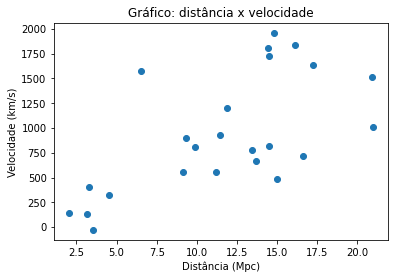

In [8]:
nome = galaxias['nome']
d = galaxias['d']
v = galaxias['v']

fig, axes = plt.subplots() # Cria uma figura e um Axes
axes.set_xlabel('Distância (Mpc)')
axes.set_ylabel('Velocidade (km/s)')
axes.set_title('Gráfico: distância x velocidade')
axes.plot(d , v, 'o')
plt.show()

**b. (2 pontos)** Por incrível que pareça, Hubble tinha dados piores! Se o seu gráfico foi feito corretamente, você verá que existe uma certa tendência do redshift aumentar com a distância, com galáxias mais distantes se afastando com velocidades maiores. Para um astrofísico, uma tendência é mais que suficiente para justificar a busca por uma correlação, para derivar uma lei empírica. Se $v$ e $d$ formam uma relação linear, podemos escrever

$$
v = v_0 + H_0\,d,
$$

onde $v_0$ é a velocidade se $d=0$, e $H_0$ é a constante de proporcionalidade entre $v$ e $d$, em unidades de $[\mathrm{km}\,\mathrm{s}^{-1}\,\mathrm{Mpc}^{-1}]$. Use um ajuste linear, e determine (e imprima) estes coeficientes. Faça também o gráfico mostrando o ajuste, para ter certeza de que o ajuste funcionou. Como não temos as incertezas, admita que os erros são iguais a 1.

Ajuste linear: a = vo = 140.72 km/s , b = Ho = 68.52 km/(s*Mpc) 


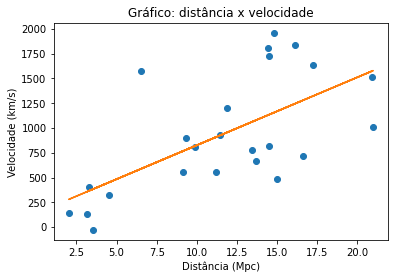

In [9]:
# Ajuste Linear

# Erro na medida da distenção, todos iguais a 1 
s = np.full(len(d), 1.0)

# Quantidades auxiliares (escalares, dependem apenas das medidas).
S = np.sum(s**-2)
Sx = np.sum(d / s**2)
Sy = np.sum(v / s**2)
Sxy = np.sum(d * v / s**2)
Sxx = np.sum(d**2 / s**2)
delta = S * Sxx - Sx**2

# Melhor ajuste
a = (Sxx * Sy - Sx * Sxy) / delta
b = (S * Sxy - Sx * Sy) / delta
print(f'Ajuste linear: a = vo = {a:.2f} km/s , b = Ho = {b:.2f} km/(s*Mpc) ')

# Criando grafico
fig, ax = plt.subplots() # Cria uma figura e um Axes
ax.set_xlabel('Distância (Mpc)')
ax.set_ylabel('Velocidade (km/s)')
ax.set_title('Gráfico: distância x velocidade')
ax.plot(d , v, 'o')
ax.plot(d, a + b * d)
plt.show()

**c. (2 pontos)** Repare que o coeficiente linear $v_0$ do ajuste é muito pequeno, praticamente nulo em comparação com o espalhamento dos pontos no gráfico. Vamos considerar então que a nossa lei empírica é

$$
v = H_0\,d.
$$

Esta é a lei de Hubble–Lemaître, onde $H_0$ é a chamada *constante de Hubble*. Ela sugere que as galáxias estão se afastando umas das outras, ou melhor, o universo está expandindo.

Podemos agora explorar algumas consequências desta lei. Suponha que a velocidade de cada galáxia, em primeira aproximação, é constante no tempo. Da cinemática, temos

$$
v = \frac{d}{T},
$$

onde $T$ é o tempo que a galáxia levou para percorrer a distância $d$. Comparand com a lei empírica que determinamos,

$$
c = \frac{d}{T} = H_0 d \\
\implies T = \frac{1}{H_0}.
$$

Isto é, o tempo que todas as galáxias viajaram é igual! Se voltarmos no tempo, estas galáxias se aproximam de nós até que, há um tempo $T$ atrás, $d=0$. Em outras palavras, estas galáxias estavam exatamente sobre a nossa. Você acabou de encontrar outra evidência, de que aparentemente todas as galáxias do Universo estavam muito próximas, há um tempo $T = H_0^{-1}$ atrás, chamado *tempo de Hubble*. Esta evidência evoluiu para se tornar o modelo cosmológico do Big Bang.

Numa primeira aproximação, este tempo $T$ dá a idade do universo no modelo do Big Bang. Sabendo que $1\,\mathrm{Mpc} = 30.857 \times 10^{18}\,\mathrm{km}$, e que 1 ano tem $31557600$ segundos, calcule a idade do universo, segundo os nossos dados. Imprima o resultado em bilhões de anos (1 bilhão $=10^9$).

*Nota*: Segundo a [colaboração Planck](https://en.wikipedia.org/wiki/Age_of_the_universe#Planck), usando o modelo $\Lambda\mathrm{CDM}$ em vez da nossa aproximação grosseira, a constante de Hubble é $H_0 = 67.74 \pm 0.46\,\mathrm{km}\,\mathrm{s}^{-1}\,\mathrm{Mpc}^{-1}$, e a idade do universo é de $(13.799 \pm 0.021) \times 10^9$ anos.

In [10]:
Ho = b    # km/(s*Mpc)

# Fazendo ajuste dimensional:
Ho_ = Ho*31557600/30.857e18   # anos^-1
T = 1/Ho_    # anos

print(f'Ho = {Ho:.2f} km/s')
print(f'Idade do universo = {T/1e9:.3f} x 10^9 anos')

Ho_tab = 67.74   # km/(s*Mpc)
T_tab = 13.799   # *1e9

# Erros
erro_Ho = (np.abs(Ho - Ho_tab) / Ho_tab) * 100
erro_T = (np.abs(T/1e9 - T_tab) / T_tab) * 100

print(f'Erro: Ho = {erro_Ho:.2f}% e T = {erro_T:.2f}%')

Ho = 68.52 km/s
Idade do universo = 14.270 x 10^9 anos
Erro: Ho = 1.15% e T = 3.41%
